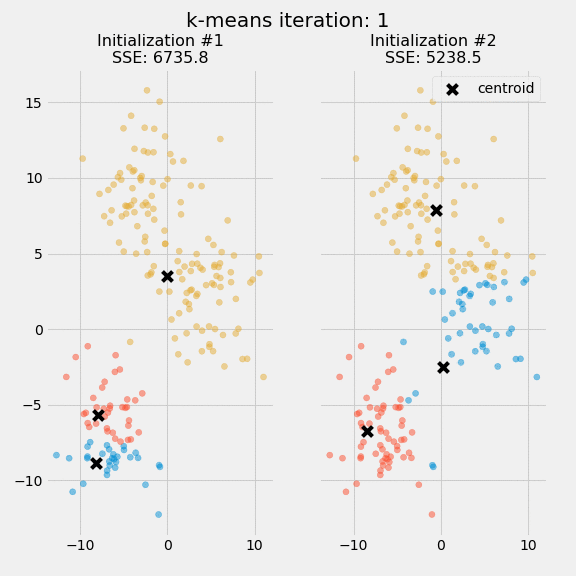

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [ ]:
iris_df.head()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
kmeans = KMeans(init="random",n_clusters=4,n_init=10,max_iter=100)
kmeans.fit(iris_df)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=100, n_clusters=4,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [ ]:
kmeans.cluster_centers_, kmeans.n_iter_

(array([[6.2525    , 2.855     , 4.815     , 1.625     ],
        [6.9125    , 3.1       , 5.846875  , 2.13125   ],
        [5.006     , 3.428     , 1.462     , 0.246     ],
        [5.53214286, 2.63571429, 3.96071429, 1.22857143]]), 4)

In [ ]:
kmeans.labels_

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(iris_df)
kmeans1 = KMeans(init="k-means++",n_clusters=2,n_init=10,max_iter=100)
label = kmeans1.fit_predict(df)

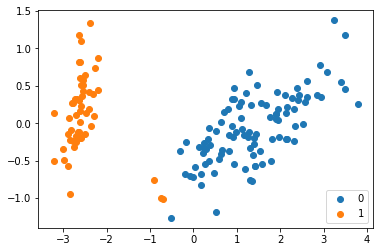

In [ ]:
u_labels = np.unique(label)
 
#Visualization
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

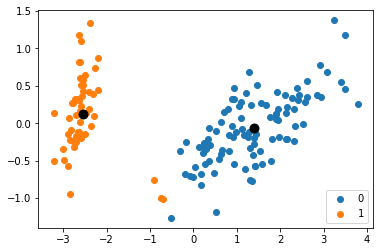

In [ ]:
centroids = kmeans1.cluster_centers_
u_labels = np.unique(label)
 

for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'black')
plt.legend()
plt.show()

Now, have a look at two methods that are commonly used to evaluate the appropriate number of clusters:

1) The elbow method
2) The silhouette coefficient

To perform the elbow method, run several k-means, increment k with each iteration, and record the SSE:

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 3.

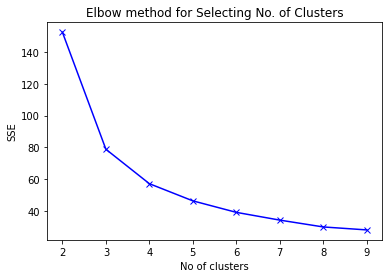

In [ ]:
SSE =[]
for i in range(2, 10):
    kmeans = KMeans(init="k-means++",n_clusters=i,n_init=10,max_iter=100)
    kmeans.fit(iris_df)
    SSE.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(2, 10), SSE, 'bx-')
plt.title('Elbow method for Selecting No. of Clusters')
plt.xlabel('No of clusters')
plt.ylabel('SSE')
plt.show()

Determining the elbow point in the SSE curve isn’t always straightforward.

In [ ]:
pip install kneed

In [ ]:
from kneed import DataGenerator, KneeLocator
k = KneeLocator(range(2, 10), SSE, curve="convex", direction="decreasing")
k.elbow

4

The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

How close the data point is to other points in the cluster
How far away the data point is from points in other clusters
Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.

In [ ]:
from sklearn.metrics import silhouette_score
# A list holds the silhouette coefficients for each k
sil_coef = []
  # Must start with min 2 clusters for silhouette coefficient
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(iris_df)
  score = silhouette_score(iris_df, kmeans.labels_)
  sil_coef.append(score)

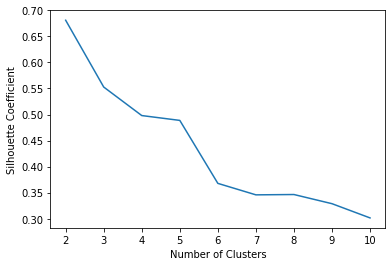

In [ ]:
plt.plot(range(2, 11), sil_coef)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

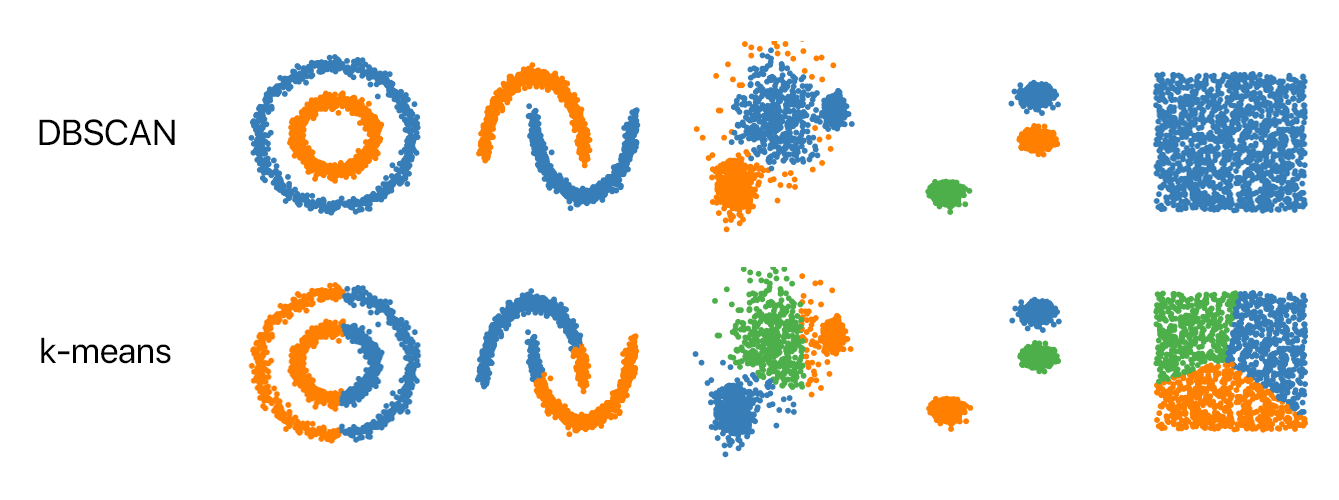

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features, true_labels = make_moons(n_samples=250, noise=0.05, random_state=42)
scaled_features = scaler.fit_transform(features)

In [ ]:
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
k_label= kmeans.fit_predict(scaled_features)
db_label=dbscan.fit_predict(scaled_features)

<function matplotlib.pyplot.show>

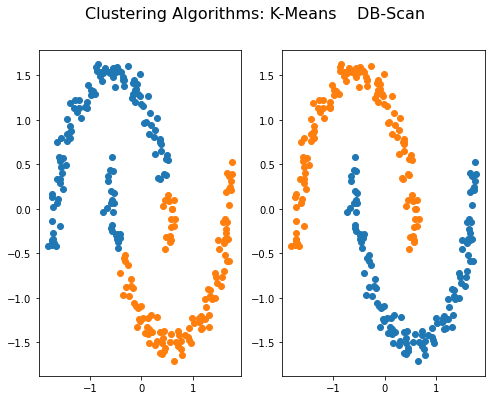

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6))
fig.suptitle("Clustering Algorithms: K-Means    DB-Scan", fontsize=16)
from numpy import where
from matplotlib import pyplot
clusters = np.unique(k_label)
cluster1 = np.unique(db_label)
# create scatter plot for samples from each cluster
for kcluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(k_label == kcluster)
	# create scatter of these samples
	ax1.scatter(scaled_features[row_ix, 0], scaled_features[row_ix, 1])
 
for dbcluster in cluster1:
	# get row indexes for samples with this cluster
	row_yx = where(db_label == dbcluster)
	# create scatter of these samples
	ax2.scatter(scaled_features[row_yx, 0], scaled_features[row_yx, 1])

# show the plot
plt.show

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
preprocessor = Pipeline(
    [
          ("pca", PCA(n_components=2, random_state=42)),
      ]
    )

In [ ]:
clusterer = Pipeline(
      [
          (
              "kmeans",
               KMeans(
                  n_clusters=3,
                  init="k-means++",
                  n_init=50,
                 max_iter=100,
                 random_state=42,
               ),
           ),
       ]
    )

In [ ]:
pipe = Pipeline(
    [
           ("preprocessor", preprocessor),
           ("clusterer", clusterer)
      ]
   )

In [ ]:
pipe.fit(iris_df)

Pipeline(memory=None,
         steps=[('preprocessor',
                 Pipeline(memory=None,
                          steps=[('pca',
                                  PCA(copy=True, iterated_power='auto',
                                      n_components=2, random_state=42,
                                      svd_solver='auto', tol=0.0,
                                      whiten=False))],
                          verbose=False)),
                ('clusterer',
                 Pipeline(memory=None,
                          steps=[('kmeans',
                                  KMeans(algorithm='auto', copy_x=True,
                                         init='k-means++', max_iter=500,
                                         n_clusters=3, n_init=50, n_jobs=None,
                                         precompute_distances='auto',
                                         random_state=42, tol=0.0001,
                                         verbose=0))],
                          

In [ ]:
predicted_labels = pipe["clusterer"]["kmeans"].labels_

In [ ]:
predicted_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)